In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [10]:
df = pd.read_csv("D:\Datascience_code\Dataset\diabetes.csv")

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.shape

(768, 9)

In [13]:
df.size

6912

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop("Outcome",axis=1)
Y = df['Outcome']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,train_size=.75)

In [33]:
Xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
305,2,120,76,37,105,39.7,0.215,29
369,1,133,102,28,140,32.8,0.234,45
584,8,124,76,24,600,28.7,0.687,52
160,4,151,90,38,0,29.7,0.294,36
651,1,117,60,23,106,33.8,0.466,27
...,...,...,...,...,...,...,...,...
552,6,114,88,0,0,27.8,0.247,66
480,3,158,70,30,328,35.5,0.344,35
15,7,100,0,0,0,30.0,0.484,32
258,1,193,50,16,375,25.9,0.655,24


In [34]:
Ytrain

305    0
369    1
584    1
160    0
651    0
      ..
552    0
480    1
15     1
258    0
601    0
Name: Outcome, Length: 614, dtype: int64

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model = GaussianNB()
model.fit(Xtrain,Ytrain)
ypred=model.predict(Xtest)

In [38]:
from sklearn import metrics

In [39]:
#make predictions
predicted = model.predict(Xtest)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix
metrics.confusion_matrix(predicted,Ytest)

array([[112,  27],
       [ 15,  38]], dtype=int64)

In [47]:
model_score = model.score(Xtest,Ytest)
model_score

0.78125

In [49]:
Y_predictProb=model.predict_proba(Xtest)
from sklearn.metrics import auc,roc_curve
fpr,tpr,thresholds = roc_curve(Ytest,Y_predictProb[::,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.8204724409448819

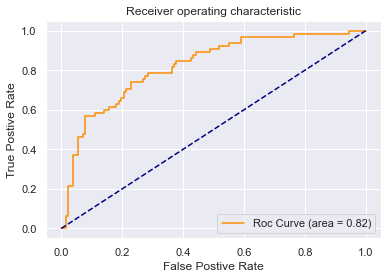

In [51]:
plt.plot(fpr,tpr,color='darkorange',label='Roc Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show() 